This notebook reads in the CDF files and makes the plots for the CDFs at 150pc. 
This plots both the entire SNe sample and the SN sample by type.
It then calculates the percentiles and mean of each group of MGSD measurements and reports them in a latex table.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from astropy import table
from astropy.table import Table, join
from astropy.io import ascii
import astropy.io.fits as pyfits
import seaborn as sns

import os

import sys
sys.path.append('/home/mayker.1/Desktop/PythonFunctions')
#sys.path.append('/Users/nessmayker/Desktop/NessPythonFunctions')
from detectionFraction import detecFrac
from cumulativeDistFunc import makeCDF
from findPercentiles import findStats
from flattenList import flatten

In [25]:
# Convert MGSD to Mass

area = (150.0/2.0)**2*np.pi/np.log(2.0)

def mgsd2mass(x):
    y = np.log10(area) + x
    return(y)

def mass2mgsd(x):
    y = x - np.log10(area)
    return(y)

def makeLog(inputArr):
    outputArr = []
    for i in range(len(inputArr)):
        if(inputArr[i] <= 1.0):
            outputArr.append(0.0)
        else:
            outputArr.append(np.log10(inputArr[i])) 
    return(outputArr)



In [3]:
# Import supernovae CDFs

SNeCDFsFile   = "../Data/3.2a.SNeCDFs.fits"
SNeCDFs = Table.read(SNeCDFsFile)

CDFdetection, ydetection = SNeCDFs["Detections"][0], SNeCDFs["Detections"][1]
# CDFdetection_mgsd_ca, ydetection_mgsd_ca = SNeCDFs["Detections"][2], SNeCDFs["Detections"][3]
CDFdetection_mgsd_mda, ydetection_mgsd_mda = SNeCDFs["Detections"][2], SNeCDFs["Detections"][3] 

CDFnondetection, ynondetection = SNeCDFs["NonDetections"][0], SNeCDFs["NonDetections"][1]
# CDFnondetection_mgsd_ca, ynondetection_mgsd_ca = SNeCDFs["NonDetections"][2], SNeCDFs["NonDetections"][3]
CDFnondetection_mgsd_mda, ynondetection_mgsd_mda = SNeCDFs["NonDetections"][2], SNeCDFs["NonDetections"][3]

CDFdetectionII, ydetectionII = SNeCDFs["DetectionsII"][0], SNeCDFs["DetectionsII"][1]
# CDFdetectionII_mgsd_ca, ydetectionII_mgsd_ca = SNeCDFs["DetectionsII"][2], SNeCDFs["DetectionsII"][3]
CDFdetectionII_mgsd_mda, ydetectionII_mgsd_mda = SNeCDFs["DetectionsII"][2], SNeCDFs["DetectionsII"][3] 

CDFnondetectionII, ynondetectionII = SNeCDFs["NonDetectionsII"][0], SNeCDFs["NonDetectionsII"][1]
# CDFnondetectionII_mgsd_ca, ynondetectionII_mgsd_ca = SNeCDFs["NonDetectionsII"][2], SNeCDFs["NonDetectionsII"][3]
CDFnondetectionII_mgsd_mda, ynondetectionII_mgsd_mda = SNeCDFs["NonDetectionsII"][2], SNeCDFs["NonDetectionsII"][3]

CDFdetectionIa, ydetectionIa = SNeCDFs["DetectionsIa"][0], SNeCDFs["DetectionsIa"][1]
# CDFdetectionIa_mgsd_ca, ydetectionIa_mgsd_ca = SNeCDFs["DetectionsIa"][2], SNeCDFs["DetectionsIa"][3]
CDFdetectionIa_mgsd_mda, ydetectionIa_mgsd_mda = SNeCDFs["DetectionsIa"][2], SNeCDFs["DetectionsIa"][3] 

CDFnondetectionIa, ynondetectionIa = SNeCDFs["NonDetectionsIa"][0], SNeCDFs["NonDetectionsIa"][1]
# CDFnondetectionIa_mgsd_ca, ynondetectionIa_mgsd_ca = SNeCDFs["NonDetectionsIa"][2], SNeCDFs["NonDetectionsIa"][3]
CDFnondetectionIa_mgsd_mda, ynondetectionIa_mgsd_mda = SNeCDFs["NonDetectionsIa"][2], SNeCDFs["NonDetectionsIa"][3]

CDFdetectionSESN, ydetectionSESN = SNeCDFs["DetectionsSESN"][0], SNeCDFs["DetectionsSESN"][1]
# CDFdetectionIbc_mgsd_ca, ydetectionIbc_mgsd_ca = SNeCDFs["DetectionsIbc"][2], SNeCDFs["DetectionsIbc"][3]
CDFdetectionSESN_mgsd_mda, ydetectionSESN_mgsd_mda = SNeCDFs["DetectionsSESN"][2], SNeCDFs["DetectionsSESN"][3] 

CDFnondetectionSESN, ynondetectionSESN = SNeCDFs["NonDetectionsSESN"][0], SNeCDFs["NonDetectionsSESN"][1]
# CDFnondetectionIbc_mgsd_ca, ynondetectionIbc_mgsd_ca = SNeCDFs["NonDetectionsIbc"][2], SNeCDFs["NonDetectionsIbc"][3]
CDFnondetectionSESN_mgsd_mda, ynondetectionSESN_mgsd_mda = SNeCDFs["NonDetectionsSESN"][2], SNeCDFs["NonDetectionsSESN"][3]

CDFdetectionUnC, ydetectionUnC = SNeCDFs["DetectionsUnC"][0], SNeCDFs["DetectionsUnC"][1]
# CDFdetectionUnC_mgsd_ca, ydetectionUnC_mgsd_ca = SNeCDFs["DetectionsUnC"][2], SNeCDFs["DetectionsUnC"][3]
CDFdetectionUnC_mgsd_mda, ydetectionUnC_mgsd_mda = SNeCDFs["DetectionsUnC"][2], SNeCDFs["DetectionsUnC"][3] 

CDFnondetectionUnC, ynondetectionUnC = SNeCDFs["NonDetectionsUnC"][0], SNeCDFs["NonDetectionsUnC"][1]
# CDFnondetectionUnC_mgsd_ca, ynondetectionUnC_mgsd_ca = SNeCDFs["NonDetectionsUnC"][2], SNeCDFs["NonDetectionsUnC"][3]
CDFnondetectionUnC_mgsd_mda, ynondetectionUnC_mgsd_mda = SNeCDFs["NonDetectionsUnC"][2], SNeCDFs["NonDetectionsUnC"][3]

# Import All Pixel CDFs

CDFAPIFile    = "../Data/3.2a_CDFAllPixelsInts.fits"
CDFAPLFile    = "../Data/3.2a_CDFAllPixelsLims.fits"
# CDFAPIcaFile  = "../Data/3.2a_CDFAllPixelsInts_ca.fits"
# CDFAPLcaFile  = "../Data/3.2a_CDFAllPixelsLims_ca.fits"
CDFAPImdaFile = "../Data/3.2a_CDFAllPixelsInts_mgsd_mda.fits"
CDFAPLmdaFile = "../Data/3.2a_CDFAllPixelsLims_mgsd_mda.fits"

CDFAPI    = Table.read(CDFAPIFile)
CDFAPL    = Table.read(CDFAPLFile) 
# CDFAPIca  = Table.read(CDFAPIcaFile) 
# CDFAPLca  = Table.read(CDFAPLcaFile) 
CDFAPImda = Table.read(CDFAPImdaFile) 
CDFAPLmda = Table.read(CDFAPLmdaFile) 

APIx, APIy = CDFAPI["CDFAllPixelsInts"][0], CDFAPI["CDFAllPixelsInts"][1]
# APIx_mgsd_ca, APIy_mgsd_ca = CDFAPIca["CDFAllPixelsInts_ca"][0], CDFAPIca["CDFAllPixelsInts_ca"][1]
APIx_mgsd_mda, APIy_mgsd_mda = CDFAPImda["CDFAllPixelsInts_mgsd_mda"][0], CDFAPImda["CDFAllPixelsInts_mgsd_mda"][1]

APLx, APLy = CDFAPL["CDFAllPixelsLims"][0], CDFAPL["CDFAllPixelsLims"][1]
# APLx_mgsd_ca, APLy_mgsd_ca = CDFAPLca["CDFAllPixelsLims_ca"][0], CDFAPLca["CDFAllPixelsLims_ca"][1]
APLx_mgsd_mda, APLy_mgsd_mda = CDFAPLmda["CDFAllPixelsLims_mgsd_mda"][0], CDFAPLmda["CDFAllPixelsLims_mgsd_mda"][1]


In [4]:
# Convert functions to log for plot

logCDFAPIx          = makeLog(APIx)
# logCDFAPIx_mgsd_ca  = makeLog(APIx_mgsd_ca)
logCDFAPIx_mgsd_mda = makeLog(APIx_mgsd_mda)
logCDFAPLx          = makeLog(APLx)
# logCDFAPLx_mgsd_ca  = makeLog(APLx_mgsd_ca)
logCDFAPLx_mgsd_mda = makeLog(APLx_mgsd_mda)

logCDFnondetection          = makeLog(CDFnondetection)
# logCDFnondetection_mgsd_ca  = makeLog(CDFnondetection_mgsd_ca)
logCDFnondetection_mgsd_mda = makeLog(CDFnondetection_mgsd_mda)
logCDFdetection             = makeLog(CDFdetection)
# logCDFdetection_mgsd_ca     = makeLog(CDFdetection_mgsd_ca)
logCDFdetection_mgsd_mda    = makeLog(CDFdetection_mgsd_mda)

logCDFnondetectionII          = makeLog(CDFnondetectionII)
# logCDFnondetectionII_mgsd_ca  = makeLog(CDFnondetectionII_mgsd_ca)
logCDFnondetectionII_mgsd_mda = makeLog(CDFnondetectionII_mgsd_mda)
logCDFdetectionII             = makeLog(CDFdetectionII)
# logCDFdetectionII_mgsd_ca     = makeLog(CDFdetectionII_mgsd_ca)
logCDFdetectionII_mgsd_mda    = makeLog(CDFdetectionII_mgsd_mda)

logCDFnondetectionIa          = makeLog(CDFnondetectionIa)
# logCDFnondetectionIa_mgsd_ca  = makeLog(CDFnondetectionIa_mgsd_ca)
logCDFnondetectionIa_mgsd_mda = makeLog(CDFnondetectionIa_mgsd_mda)
logCDFdetectionIa             = makeLog(CDFdetectionIa)
# logCDFdetectionIa_mgsd_ca     = makeLog(CDFdetectionIa_mgsd_ca)
logCDFdetectionIa_mgsd_mda    = makeLog(CDFdetectionIa_mgsd_mda)

logCDFnondetectionSESN          = makeLog(CDFnondetectionSESN)
# logCDFnondetectionIbc_mgsd_ca  = makeLog(CDFnondetectionIbc_mgsd_ca)
logCDFnondetectionSESN_mgsd_mda = makeLog(CDFnondetectionSESN_mgsd_mda)
logCDFdetectionSESN             = makeLog(CDFdetectionSESN)
# logCDFdetectionIbc_mgsd_ca     = makeLog(CDFdetectionIbc_mgsd_ca)
logCDFdetectionSESN_mgsd_mda    = makeLog(CDFdetectionSESN_mgsd_mda)

logCDFnondetectionUnC          = makeLog(CDFnondetectionUnC)
# logCDFnondetectionUnC_mgsd_ca  = makeLog(CDFnondetectionUnC_mgsd_ca)
logCDFnondetectionUnC_mgsd_mda = makeLog(CDFnondetectionUnC_mgsd_mda)
logCDFdetectionUnC             = makeLog(CDFdetectionUnC)
# logCDFdetectionUnC_mgsd_ca     = makeLog(CDFdetectionUnC_mgsd_ca)
logCDFdetectionUnC_mgsd_mda    = makeLog(CDFdetectionUnC_mgsd_mda)


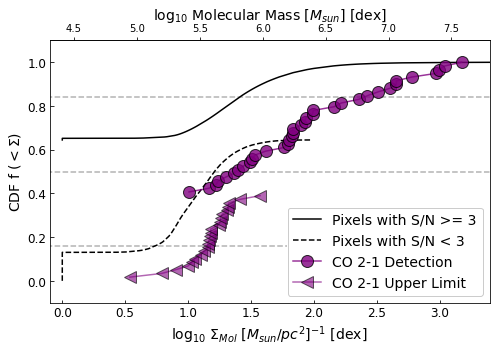

In [5]:
# Single Plot Metallicity Dependent Alpha

ms = 12
fs = 14

fig, axs = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(7)
axs.plot(logCDFAPIx_mgsd_mda, APIy_mgsd_mda, color = 'black', linestyle = '-', label = 'Pixels with S/N >= 3')
axs.plot(logCDFAPLx_mgsd_mda, APLy_mgsd_mda, color = 'black', linestyle = '--', label = 'Pixels with S/N < 3')
# axs.annotate(r'$\alpha_{CO}$: Sun+20', xy=(110, 179), xycoords='axes points',
#             size=14, ha='right', va='top', 
#             bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs.axhline(y=0.16, xmin=-0.3, xmax = 0.54, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]^{-1}$ [dex]', fontsize = fs)
secax = axs.secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
secax.set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$] [dex]', fontsize = fs)
axs.set_ylabel(r'CDF f $ (<\Sigma$)', fontsize = fs)
axs.set_xlim(-0.1, np.log10(CDFdetection_mgsd_mda[-1] + 1000))
axs.set_ylim(-0.1, 1.1)
axs.plot(logCDFdetection_mgsd_mda, ydetection_mgsd_mda, marker = 'o', ms = ms, color = 'purple',mec='black', alpha = 0.8, label="CO 2-1 Detection")
axs.plot(logCDFnondetection_mgsd_mda, ynondetection_mgsd_mda, marker = '<',color = 'purple',mec='black', ms = ms, alpha = 0.6, label = "CO 2-1 Upper Limit")
axs.legend(frameon=True,loc='lower right', fontsize = 14,facecolor='white', framealpha=1)
axs.tick_params(axis='both', direction = "in", labelsize = 12)
plt.tight_layout()
plt.savefig('../Figures/COEmissionCDFSingleMDA.png', dpi=300)

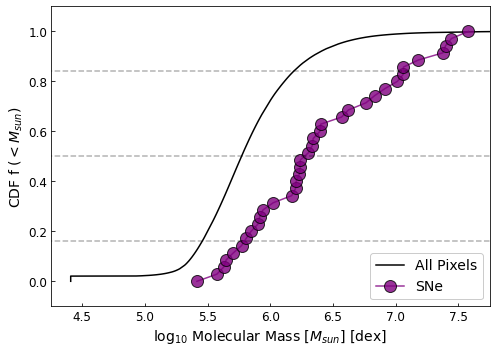

In [46]:
# Make mass-based CDF for detections plot

logMassDetections = mgsd2mass(makeLog(CDFdetection_mgsd_mda))
CDFlogMassDetections, yLogMassDetections = makeCDF(logMassDetections, min=0)

logAPIMassDetections =  mgsd2mass(makeLog(APIx_mgsd_mda))
CDFlogAPIMassDetections, yLogAPIMassDetections = makeCDF(logAPIMassDetections, min=0)

fig, axs = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(7)
axs.plot(CDFlogAPIMassDetections, yLogAPIMassDetections, color = "black", label = "All Pixels")
axs.plot(CDFlogMassDetections, yLogMassDetections, color = "purple", marker = 'o',ms=ms,mec="black",alpha=0.8, label = "SNe")
axs.axhline(y=0.16, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.50, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs.set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$] [dex]', fontsize = fs)
axs.set_ylabel(r'CDF f $ (< M_{sun} $)', fontsize = fs)
axs.set_xlim(4.25, 7.75)
axs.set_ylim(-0.1, 1.1)
axs.legend(frameon=True,loc='lower right', fontsize = 14,facecolor='white', framealpha=1)
axs.tick_params(axis='both', direction = "in", labelsize = 12)
plt.tight_layout()
plt.savefig('../Figures/MassCDF150pcAllDetections.png', dpi=300)



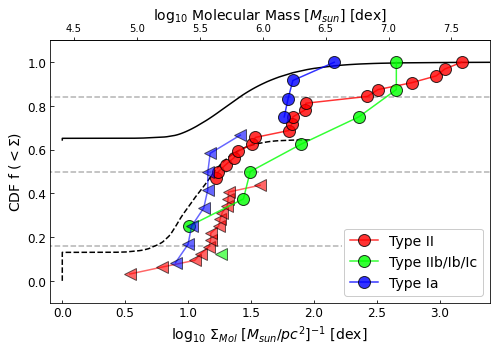

In [7]:
# Single Plot Sun+20 Alpha - All Types!

ms = 12
fs = 14

fig, axs = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(7)
axs.plot(logCDFAPIx_mgsd_mda, APIy_mgsd_mda, color = 'black', linestyle = '-')
axs.plot(logCDFAPLx_mgsd_mda, APLy_mgsd_mda, color = 'black', linestyle = '--')
# axs.annotate(r'$\alpha_{CO}$: Sun+20', xy=(110, 179), xycoords='axes points',
#             size=14, ha='right', va='top', 
#             bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs.axhline(y=0.16, xmin=-0.3, xmax = 0.665, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]^{-1}$ [dex]', fontsize = fs)
secax = axs.secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
secax.set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$] [dex]', fontsize = fs)
axs.set_ylabel(r'CDF f $ (<\Sigma$)', fontsize = fs)
axs.set_xlim(-0.1, np.log10(CDFdetection_mgsd_mda[-1] + 1000))
axs.set_ylim(-0.1, 1.1)
axs.plot(logCDFdetectionII_mgsd_mda, ydetectionII_mgsd_mda, marker = 'o', ms = ms, color = 'red',mec='black', alpha = 0.8, label="Type II")
axs.plot(logCDFnondetectionII_mgsd_mda, ynondetectionII_mgsd_mda, marker = '<',color = 'red',mec='black', ms = ms, alpha = 0.6)

axs.plot(logCDFdetectionSESN_mgsd_mda, ydetectionSESN_mgsd_mda, marker = 'o', ms = ms, color = 'lime',mec='black', alpha = 0.8, label="Type IIb/Ib/Ic")
axs.plot(logCDFnondetectionSESN_mgsd_mda, ynondetectionSESN_mgsd_mda, marker = '<',color = 'lime',mec='black', ms = ms, alpha = 0.6)

axs.plot(logCDFdetectionIa_mgsd_mda, ydetectionIa_mgsd_mda, marker = 'o', ms = ms, color = 'blue',mec='black', alpha = 0.8, label="Type Ia")
axs.plot(logCDFnondetectionIa_mgsd_mda, ynondetectionIa_mgsd_mda, marker = '<',color = 'blue',mec='black', ms = ms, alpha = 0.6)


axs.legend(frameon=True,loc='lower right', fontsize = 14,facecolor='white', framealpha=1)
axs.tick_params(axis='both', direction = "in", labelsize = 12)
plt.tight_layout()
plt.savefig('../Figures/COEmissionCDFByType.png', dpi=300)

In [8]:
! THis is where I stopped...need to convert ibc to SESN in code below

/bin/bash: THis: command not found


In [9]:
def convertNCR(limarray, valarray):
    lims = np.zeros(len(limarray))
    array = np.concatenate((lims, valarray),0)
    ncr = array/array[-1]
    return(ncr)
print(len(logCDFnondetectionIbc_mgsd_mda), len(logCDFdetectionIbc_mgsd_mda))
allPix = convertNCR(logCDFAPLx_mgsd_mda, logCDFAPIx_mgsd_mda)
print(len(allPix))
yPix = np.linspace(0,1.0,len(allPix))
allIIs = convertNCR(logCDFnondetectionII_mgsd_mda, logCDFdetectionII_mgsd_mda)
yIIs = np.linspace(0,1.0,len(allIIs))
allIbc = convertNCR(logCDFnondetectionIbc_mgsd_mda, logCDFdetectionIbc_mgsd_mda)  
yIbc = np.linspace(0,1.0,len(allIbc))
allIas = convertNCR(logCDFnondetectionIa_mgsd_mda, logCDFdetectionIa_mgsd_mda) 
yIas = np.linspace(0,1.0,len(allIas))

print(allPix)
print(yPix)

import seaborn as sns

x, y = np.linspace(-0.01,1.01,100), np.linspace(-0.01,1.01,100)
fig = plt.figure(figsize = (6,4))
#sns.ecdfplot(allPix, label = "All Pixels")
sns.ecdfplot(allIas, label = "SNe Ia")
sns.ecdfplot(allIIs, label = "SNe II")
sns.ecdfplot(allIbc, label = "SNe Ibc")
plt.legend(loc = "best")
plt.plot(x,y, color='grey', ls = '-')
plt.tick_params(axis = "both", which = "both", direction = "in")
plt.xlabel("NCR from CO Map")
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.ylabel("Fraction of SNe")
fig.savefig("../Figures/ECDFTypes.png", dpi=300)
plt.show()

NameError: name 'logCDFnondetectionIbc_mgsd_mda' is not defined

In [ ]:

YarrayAP = np.concatenate((APLy, APIy))
XarrayAP = np.concatenate((logCDFAPLx, logCDFAPIx))

YarraySNe = np.concatenate((ynondetection, ydetection))
XarraySNe = np.concatenate((logCDFnondetection, logCDFdetection))

XarrayCA = np.concatenate((logCDFnondetection_mgsd_ca, logCDFdetection_mgsd_ca))
YarrayCA = np.concatenate((ynondetection_mgsd_ca, ydetection_mgsd_ca))

XarrayMDA = np.concatenate((logCDFnondetection_mgsd_mda, logCDFdetection_mgsd_mda))
YarrayMDA = np.concatenate((ynondetection_mgsd_mda, ydetection_mgsd_mda))

XarrayAP_CA = np.concatenate((logCDFAPLx_mgsd_ca, logCDFAPIx_mgsd_ca))
YarrayAP_CA  = np.concatenate((APLy_mgsd_ca, APIy_mgsd_ca))

XarrayAP_MDA = np.concatenate((logCDFAPLx_mgsd_mda, logCDFAPIx_mgsd_mda))
YarrayAP_MDA = np.concatenate((APLy_mgsd_mda, APIy_mgsd_mda))

statsSNe     = findStats(YarraySNe, XarraySNe)
statsSNe.append(np.round(np.mean(XarraySNe),2))

statsCA      = findStats(YarrayCA, XarrayCA)
statsCA.append(np.round(np.mean(XarrayCA),2))

statsMDA     = findStats(YarrayMDA, XarrayMDA)
statsMDA.append(np.round(np.mean(XarrayMDA),2))

statsAP      = findStats(YarrayAP, XarrayAP)
statsAP.append(np.round(np.mean(XarrayAP),2))

statsAP_CA   = findStats(YarrayAP_CA, XarrayAP_CA)
statsAP_CA.append(np.round(np.mean(XarrayAP_CA),2))

statsAP_MDA  = findStats(YarrayAP_MDA, XarrayAP_MDA)
statsAP_MDA.append(np.round(np.mean(XarrayAP_MDA),2))


YarrayII = np.concatenate((ynondetectionII_mgsd_mda, ydetectionII_mgsd_mda))
XarrayII = np.concatenate((logCDFnondetectionII_mgsd_mda, logCDFdetectionII_mgsd_mda))

YarrayIbc = np.concatenate((ynondetectionIbc_mgsd_mda, ydetectionIbc_mgsd_mda))
XarrayIbc = np.concatenate((logCDFnondetectionIbc_mgsd_mda, logCDFdetectionIbc_mgsd_mda))

YarrayIa = np.concatenate((ynondetectionIa_mgsd_mda, ydetectionIa_mgsd_mda))
XarrayIa = np.concatenate((logCDFnondetectionIa_mgsd_mda, logCDFdetectionIa_mgsd_mda))

statsII     = findStats(YarrayII, XarrayII)
statsII.append(np.round(np.mean(XarraySNe),2))

statsIa      = findStats(YarrayIa, XarrayIa)
statsIa.append(np.round(np.mean(XarrayIa),2))

statsIbc     = findStats(YarrayIbc, XarrayIbc)
statsIbc.append(np.round(np.mean(XarrayIbc),2))


CDFStats = Table({'Percentiles' : ["0.05","0.16","0.50","0.84","0.95", "Mean"],
                #'AllPixels'     : statsAP,
                #'AllCA'         : statsAP_CA,
                'AllMDA'        : statsAP_MDA,
                #'SNe'           : statsSNe,
                #'SNeCA'         : statsCA,
                'SNeMDA'        : statsMDA,                   
                'TypeII'        : statsII,
                'TypeIbc'       : statsIbc,
                'TypeIa'        : statsIa
                 })
CDFStats.write('../Data/3.2b.PercentilesStats.tex', format = 'latex', overwrite=True)

CDFStats
